In [1]:
import torch
import torchvision
import torchvision.transforms as transforms 


transforms.TO.Tensor()-- 데이터를 텐서로 변경시킴

transforms.Normalize---- 정규화 시킴

transforms.compose---> 여러단계로 변환해야하는 경우, compose를 통해 여러 단계를 묶을 수 있다.

Dataset클래스의 getitem 함수내에서 데이터를 변환하여 리턴될 때 주로 사용

PyTorch는 torch.utils.data.DataLoader 와 torch.utils.data.Dataset 의 두 가지 데이터 기본 요소를 제공하여 미리 준비해둔(pre-loaded) 데이터셋 뿐만 아니라 가지고 있는 데이터를 사용할 수 있도록 합니다

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root = './data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size = batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [4]:


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:

import matplotlib.pyplot as plt
import numpy as np
     

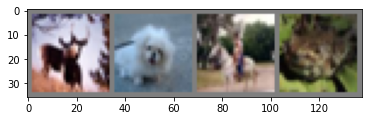

deer  dog   horse frog 


In [7]:
def imshow(img):
  img = img / 2+0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()
#학습용 이미지를 무작위로 가지고 오기기
dataiter = iter(trainloader) #이런식으로 정의해 두고
images, labels = next(dataiter) #next를 실행해서 다음 batch가 나오도록 실행
#이미지 보여주기
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Convolution 연산을 위한 레이어들은 다음과 같습니다.

Conv1d (Text-CNN에서 많이 사용)

Conv2d (이미지 분류에서 많이 사용)

Maxpool이란?

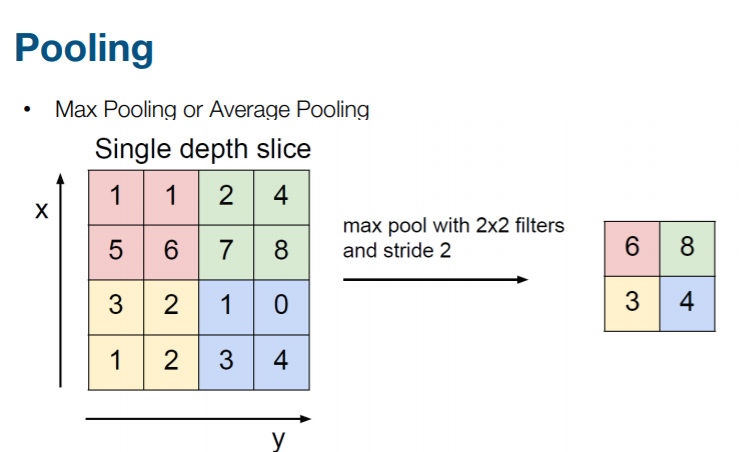

conv2d에서 사용되는 파라미터는 위와 같습니다. 여기서 입력되어야 하는 파라미터는 in_channels, out_channels, kernel_size 입니다

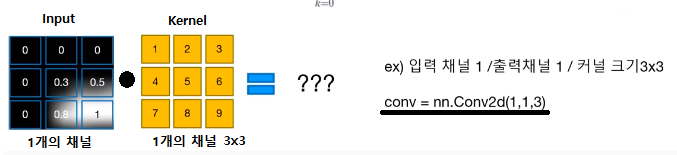

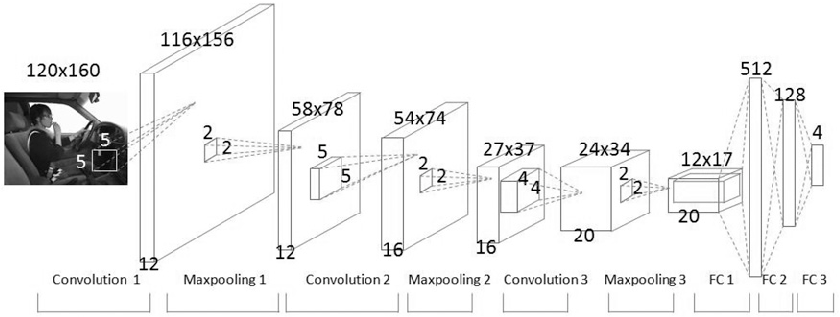

활성화 함수를 지정할 때는 다음 두 가지 방법이 가능합니다.

• F.relu(): forward() 함수에서 정의

• nn.ReLU(): __init__() 함수에서 정의

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  
  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x,1) #배치를 제외한 모든 차원을 평평하게 한다.
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
net = Net()


In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.01, momentum=0.9)


오차(error)를 역전파하기 위해서는 loss.backward() 만 해주면 됩니다.

In [11]:

for epoch in range(2):

  running_loss= 0.0
  for i ,data in enumerate(trainloader,0):
    inputs, labels = data

  optimizer.zero_grad()

  outputs = net(inputs)
  loss = criterion(outputs, labels)
  loss.backward()
  optimizer.step()

  running_loss += loss.item()

  if i % 2000 == 1999:    # print every 2000 mini-batches
       print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
       running_loss = 0.0

print('Finished Training')



Finished Training


In [12]:

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
     

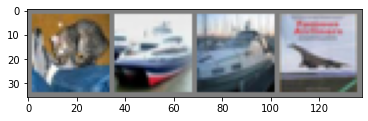

GroundTruth:  cat   ship  ship  plane


In [13]:

dataiter = iter(testloader)
images,labels = next(dataiter)

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))